In [56]:
import pandas as pd
import numpy as np
import os

In [57]:
# disable display limit for pandas
pd.set_option('display.max_columns', None)


# Data loading, EDA and preprocessing

In [58]:
# read all file names in the directory
files = os.listdir('../data/raw')

# read all files into one dataframe
df = pd.DataFrame()
for file in files:
    df = pd.concat([df, pd.read_csv('../data/raw/' + file)], ignore_index=True)

In [59]:
# inspect the data
df.head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Monday-WorkingHours.pcap_ISCX.csv filter=lfs diff=lfs merge=lfs -text
0,22.0,166.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,12048.192770,166.0000,0.000000e+00,166.0,166.0,0.0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,32.0,6024.096386,6024.096386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,290.0,243.0,0.0,32.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN,NaN
1,60148.0,83.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,36144.578310,41.5000,1.060660e+01,49.0,34.0,0.0,0.0000,0.000,0.0,0.0,49.0,49.0,0.0,49.0,49.0,0.0,0.0,0.0,0.0,32.0,64.0,12048.192770,24096.385540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,243.0,290.0,0.0,32.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN,NaN
2,123.0,99947.0,1.0,1.0,48.0,48.0,48.0,48.0,48.0,0.0,48.0,48.0,48.0,0.0,960.509070,20.010606,99947.0000,0.000000e+00,99947.0,99947.0,0.0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,40.0,10.005303,10.005303,48.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,72.0,48.0,48.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,1.0,48.0,-1.0,-1.0,0.0,40.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN,NaN
3,123.0,37017.0,1.0,1.0,48.0,48.0,48.0,48.0,48.0,0.0,48.0,48.0,48.0,0.0,2593.403031,54.029230,37017.0000,0.000000e+00,37017.0,37017.0,0.0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,32.0,27.014615,27.014615,48.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,72.0,48.0,48.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,1.0,48.0,-1.0,-1.0,0.0,32.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN,NaN
4,0.0,111161336.0,147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.322402,761379.0137,2.539814e+06,13600000.0,0.0,111000000.0,761379.0137,2539814.273,13600000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.322402,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,1753752.625,2123197.578,4822992.0,95.0,9463032.7,2657727.996,13600000.0,5700287.0,BENIGN,NaN


In [60]:
# summary statistics
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.829385e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2.830743e+06,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,4.104958e+01,3.059493e+02,3.353257e+02,inf,inf,1.298449e+06,2.919271e+06,9.182475e+06,1.623796e+05,1.448296e+07,2.610193e+06,3.266957e+06,9.042939e+06,1.021893e+06,9.893830e+06,1.805784e+06,1.485973e+06,4.684692e+06,9.672614e+05,4.644646e-02,0.0,1.112782e-04,0.0,-2.599739e+04,-2.273275e+03,6.386535e+04,6.995192e+03,1.643450e+01,9.504024e+02,1.719444e+02,2.949756e+02,4.861548e+05,3.537976e-02,4.644646e-02,2.423392e-04,2.980705e-01,3.158443e-01,9.482316e-02,1.112782e-04,2.433990e-04,6.835004e-01,1.919837e+02,5.820194e+01,3.059493e+02,-2.599739e+04,0.0,0.0,0.0,0.0,0.0,0.0,9.361160e+00,5.492919e+02,1.039377e+01,1.616230e+04,6.989837e+03,1.989433e+03,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,1.946367e+03,6.886260e+01,6.052568e+02,8.396932e+02,NaN,NaN,4.507944e+06,8.045870e+06,2.445954e+07,2.950282e+06,3.357581e+07,9.525722e+06,9.639055e+06,2.452916e+07,8.591436e+06,2.873661e+07,8.887197e+06,6.278469e+06,1.716095e+07,8.308983e+06,2.104500e-01,0.0,1.054826e-02,0.0,2.105286e+07,1.452209e+06,2.475371e+05,3.815170e+04,2.523772e+01,2.028229e+03,3.054915e+02,6.318001e+02,1.647490e+06,1.847378e-01,2.104500e-01,1.556536e-02,4.574107e-01,4.648513e-01,2.929706e-01,1.054826e-02,1.559935e-02,6.804920e-01,3.318603e+02,1.860912e+02,6.052568e+02,2.105286e+07,0.0,0.0,0.0,0.0,0.0,0.0,7.496728e+02,9.980070e+03,9.973883e+02,2.26305

In [61]:
# column names
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [62]:
# drop last column
df.drop(df.columns[-1], axis=1, inplace=True)

# check column names
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [63]:
# remove whitespace from column names
df.columns = df.columns.str.strip()

# clean the 
df['Label'] = df['Label'].str.replace(' � ', ' ')


In [64]:
# shape
df.shape

(2830750, 79)

In [65]:
# check for missing values
df.isnull().sum()

Destination Port               7
Flow Duration                  7
Total Fwd Packets              7
Total Backward Packets         7
Total Length of Fwd Packets    7
                              ..
Idle Mean                      7
Idle Std                       7
Idle Max                       7
Idle Min                       7
Label                          7
Length: 79, dtype: int64

In [66]:
# see label distribution for missing values
print("Value counts for label for missing rows: ")
print(df[df.isnull().any(axis=1)]['Label'].value_counts())

# see how many other rows are there for 'DoS Hulk' label
print("Other rows with DoS Hulk label: ", df[df['Label'] == 'DoS Hulk'].shape[0])

# other rows with BENIGN label
print("Other rows with BENIGN label: ", df[df['Label'] == 'BENIGN'].shape[0])

Value counts for label for missing rows: 
DoS Hulk    949
BENIGN      409
Name: Label, dtype: int64
Other rows with DoS Hulk label:  231073
Other rows with BENIGN label:  2273097


In [67]:
# since we have enough data for DoS Hulk and BENIGN, we can drop the rows with missing values
# drop rows with inf values too
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# check for missing values
df.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64

In [68]:
# different labels
df['Label'].value_counts()

BENIGN                      2271320
DoS Hulk                     230124
PortScan                     158804
DDoS                         128025
DoS GoldenEye                 10293
FTP-Patator                    7935
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1956
Web Attack Brute Force         1507
Web Attack XSS                  652
Infiltration                     36
Web Attack Sql Injection         21
Heartbleed                       11
Name: Label, dtype: int64

<Axes: >

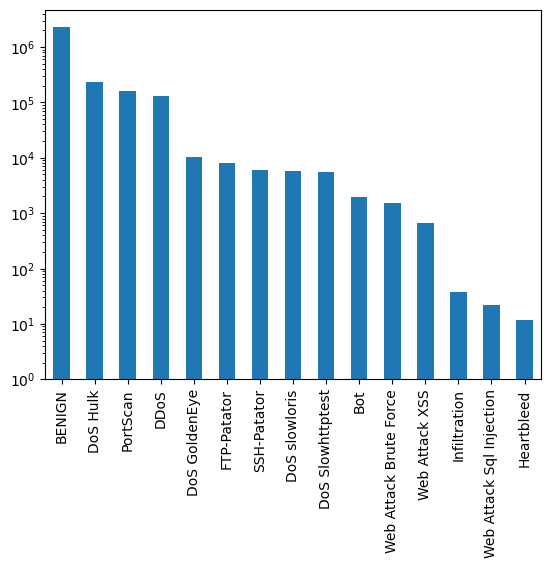

In [69]:

# plot the label distribution in log scale with x axis labels rotated 45 degrees
df['Label'].value_counts().plot(kind='bar', log=True, rot=90)

In [70]:
# filter the data to only include DoS and DDos attacks and Brute Force and XXS attacks
df = df[df['Label'].isin(['BENIGN', 'PortScan', 'FTP-Patator', 'SSH-Patator' ,'DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'DoS Slowhttptest', 'DDoS', 'Web Attack Brute Force'])]

# PortScan - activity performed by a hacker to identify open ports and services available on a host, and identify potential weaknesses
# FTP-Patator - brute force attack on FTP server
# SSH-Patator - brute force attack on SSH server
# DoS Hulk - denial of service attack on web server
# DoS GoldenEye - denial of service attack on web server
# DoS slowloris - denial of service attack on web server
# DoS Slowhttptest - denial of service attack on web server
# DDoS - distributed denial of service attack on web server
# Brute Force - brute force attack on web server

# group together all DoS attacks
df['Label'].replace(['DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'DoS Slowhttptest'], 'DoS', inplace=True)

In [71]:
# new label distribution
df['Label'].value_counts()

BENIGN                    2271320
DoS                        251712
PortScan                   158804
DDoS                       128025
FTP-Patator                  7935
SSH-Patator                  5897
Web Attack Brute Force       1507
Name: Label, dtype: int64

In [72]:
# final data
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22.0,166.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,12048.192770,166.0000,0.000000e+00,166.0,166.0,0.0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,32.0,6024.096386,6024.096386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,290.0,243.0,0.0,32.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
1,60148.0,83.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,36144.578310,41.5000,1.060660e+01,49.0,34.0,0.0,0.0000,0.000,0.0,0.0,49.0,49.0,0.0,49.0,49.0,0.0,0.0,0.0,0.0,32.0,64.0,12048.192770,24096.385540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,243.0,290.0,0.0,32.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
2,123.0,99947.0,1.0,1.0,48.0,48.0,48.0,48.0,48.0,0.0,48.0,48.0,48.0,0.0,960.509070,20.010606,99947.0000,0.000000e+00,99947.0,99947.0,0.0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,40.0,10.005303,10.005303,48.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,72.0,48.0,48.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,1.0,48.0,-1.0,-1.0,0.0,40.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
3,123.0,37017.0,1.0,1.0,48.0,48.0,48.0,48.0,48.0,0.0,48.0,48.0,48.0,0.0,2593.403031,54.029230,37017.0000,0.000000e+00,37017.0,37017.0,0.0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,32.0,27.014615,27.014615,48.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,72.0,48.0,48.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,1.0,48.0,-1.0,-1.0,0.0,32.0,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.0,BENIGN
4,0.0,111161336.0,147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.322402,761379.0137,2.539814e+06,13600000.0,0.0,111000000.0,761379.0137,2539814.273,13600000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.322402,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,1753752.625,2123197.578,4822992.0,95.0,9463032.7,2657727.996,13600000.0,5700287.0,BENIGN


In [73]:
# finally reshuffle the data
df = df.sample(frac=1).reset_index(drop=True)

# Selecting relevant features

In [74]:
# limit the number of features to the most influential ones
# first, we need to encode the labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

# store the label encoding
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))


In [75]:
# correlation matrix
corr_matrix = df.corr()

In [76]:
corr_matrix

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Destination Port,1.000000,-0.151554,-0.004222,-0.003937,0.011968,-0.003075,0.098679,-0.045311,0.141193,0.129442,-0.191559,-0.246721,-0.215792,-0.171430,0.065219,0.232943,-0.100411,-0.115832,-0.114443,-0.021858,-0.151107,-0.095236,-0.096407,-0.113479,-0.050686,-0.104824,-0.067238,-0.032446,-0.050695,-0.050042,0.224705,NaN,0.001372,NaN,0.000406,0.000693,0.218661,0.134997,-0.243211,-0.123479,-0.149118,-0.119585,-0.065448,-0.040529,0.224705,-0.006465,-0.179190,0.528487,0.504666,0.001372,-0.006376,0.037378,-0.150352,0.141193,-0.215792,0.000406,NaN,NaN,NaN,NaN,NaN,NaN,-0.004222,0.011986,-0.003937,-0.003075,-0.112533,0.210596,-0.003217,0.000896,-0.035523,-0.043724,-0.051834,-0.023142,-0.112483,0.010514,-0.108070,-0.114526,-0.092458
Flow Duration,-0.151554,1.000000,0.020770,0.019613,0.067090,0.016146,0.274222,-0.105488,0.144173,0.234743,0.497475,-0.216561,0.461691,0.445424,-0.025279,-0.122494,0.536278,0.739551,0.784241,0.065010,0.998560,0.548451,0.725467,0.783863,0.214165,0.822477,0.413526,0.522331,0.585259,0.216258,-0.010901,NaN,-0.004644,NaN,-0.000161,-0.001120,-0.113555,-0.080636,-0.227597,0.513499,0.431845,0.458311,0.282905,0.186839,-0.010901,0.008799,0.167162,0.028447,-0.101732,-0.004644,0.008750,-0.147952,0.409818,0.144173,0.461691,-0.000161,NaN,NaN,NaN,NaN,NaN,NaN,0.020770,0.067187,0.019613,0.016146,0.098820,-0.021196,0.015888,-0.001356,0.189280,0.241153,0.294077,0.121087,0.768009,0.243087,0.779499,0.738301,0.106914
Total Fwd Packets,-0.004222,0.020770,1.000000,0.999077,0.380616,0.997025,0.009280,-0.002986,-0.000009,0.001385,0.022728,-0.005589,0.021328,0.006440,0.000387,-0.002615,-0.001010,-0.000500,0.002296,-0.000540,0.020442,-0.001025,0.000086,0.001848,-0.001151,0.023937,-0.000631,0.000764,0.003407,-0.001000,0.001927,NaN,-0.000104,NaN,0.000475,0.013748,-0.002427,-0.001708,-0.006266,0.021923,0.024386,0.012006,0.005426,-0.001366,0.001927,0.000358,0.006603,0.001210,-0.003469,-0.000104,0.000356,0.001064,0.022039,-0.000009,0.021328,0.000475,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.381168,0.999077,0.997019,0.003754,-0.000365,0.887398,-0.000184,0.039859,0.008226,0.030373,0.041236,0.001819,0.000798,0.001903,0.001671,-0.003456
Total Backward Packets,-0.003937,0.019613,0.999077,1.000000,0.374879,0.994451,0.008994,-0.002600,-0.000375,0.001007,0.022544,-0.004860,0.021466,0.006115,0.000292,-0.002758,-0.001365,-0.000987,0.001825,-0.000570,0.019266,-0.001219,-0.000456,0.001363,-0.001029,0.023387,-0.000798,0.000549,0.003476,-0.000962,0.001711,NaN,-0.000109,NaN,0.000756,0.013764,-0.002621,-0.001395,-0.005697,0.021680,0.024801,0.011863,0.005400,-0.001257,0.001711,0.000232,0.006117,0.000999,-0.002838,-0.000109,0.000231,0.003469,0.022461,-0.000375,0.021466,0.000756,

In [77]:
# correlation with label
corr_matrix['Label'].sort_values(ascending=False)

Label                    1.000000
PSH Flag Count           0.279934
Fwd IAT Std              0.260920
Bwd Packet Length Std    0.242862
Idle Mean                0.241019
                           ...   
Fwd Avg Packets/Bulk          NaN
Fwd Avg Bulk Rate             NaN
Bwd Avg Bytes/Bulk            NaN
Bwd Avg Packets/Bulk          NaN
Bwd Avg Bulk Rate             NaN
Name: Label, Length: 79, dtype: float64

<Axes: >

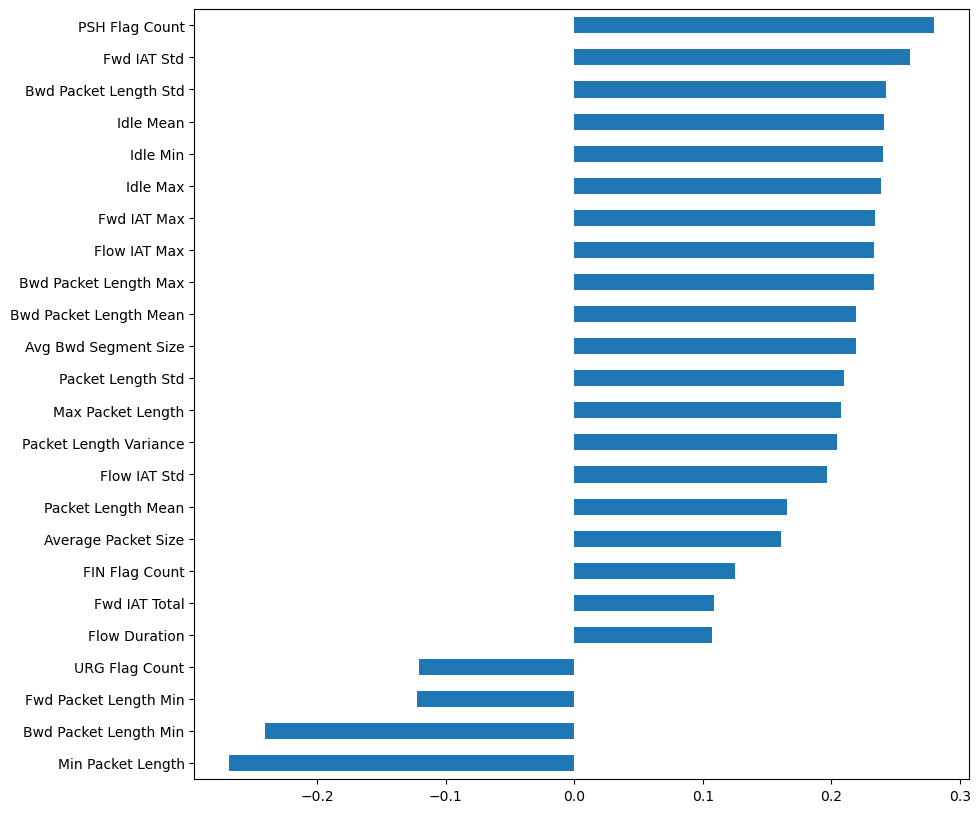

In [78]:
# plot the correlation wiht labels where correlation is greater than 0.1 or smaller than -0.1 in ascending order removing Label, in one plot, x axis label being "Correlation with Label"
corr_matrix['Label'][corr_matrix['Label'].abs() > 0.1].drop('Label').sort_values().plot(kind='barh', figsize=(10, 10))


In [79]:
# use only the columns which correlate with the label is greater than 0.1 or smaller than -0.1
# columns to keep
columns = corr_matrix[(corr_matrix['Label'] > 0.1) | (corr_matrix['Label'] < -0.1)].index

# drop all other columns
df = df[columns]

In [80]:
df.head()

,Flow Duration,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Std,Flow IAT Max,Fwd IAT Total,Fwd IAT Std,Fwd IAT Max,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,PSH Flag Count,URG Flag Count,Average Packet Size,Avg Bwd Segment Size,Idle Mean,Idle Max,Idle Min,Label
0,201.0,90.0,122.0,122.0,122.0,0.0,7.464583e+01,149.0,3.0,0.000000e+00,3.0,90.0,122.0,102.8,17.527122,307.20000,0.0,0.0,0.0,128.500000,122.0,0.0,0.0,0.0,0
1,9906.0,6.0,6.0,6.0,6.0,0.0,6.747213e+03,9724.0,9906.0,0.000000e+00,9906.0,6.0,274.0,140.0,154.729872,23941.33333,0.0,0.0,0.0,186.666667,6.0,0.0,0.0,0.0,0
2,353.0,0.0,0.0,0.0,0.0,0.0,2.003430e+02,349.0,353.0,2.003430e+02,349.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
3,54937720.0,6.0,6.0,6.0,6.0,0.0,4.885893e+06,10012953.0,54937720.0,2.640768e+06,10234384.0,6.0,6.0,6.0,0.000000,0.00000,0.0,0.0,0.0,6.461538,6.0,10012500.8,10012953.0,10012117.0,0
4,4134277.0,6.0,0.0,0.0,0.0,0.0,2.386057e+06,4133274.0,4134277.0,2.386057e+06,4133274.0,6.0,6.0,6.0,0.000000,0.00000,0.0,0.0,0.0,7.500000,0.0,0.0,0.0,0.0,1


# Classification model for attacks - training

In [81]:
# develop a simple classifier to detect the different types of attacks

# separate features and labels
X = df.drop('Label', axis=1)
y = df['Label']

# split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# check the shape of the train and test sets
print("Shape of train set: ", X_train.shape)
print("Shape of test set: ", X_test.shape)

# check the label distribution in train and test sets
print("Label distribution in train set: ")
print(y_train.value_counts())

print("Label distribution in test set: ")
print(y_test.value_counts())

# scale the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Shape of train set:  (2118900, 24)
Shape of test set:  (706300, 24)
Label distribution in train set: 
0    1703833
2     188750
4     119097
1      95774
3       5925
5       4411
6       1110
Name: Label, dtype: int64
Label distribution in test set: 
0    567487
2     62962
4     39707
1     32251
3      2010
5      1486
6       397
Name: Label, dtype: int64


In [82]:
# train a very efficient version of the Random Forest Classifier - LightGBM
import lightgbm as lgb
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

LGBMClassifier()

# Classification model - evaluation

In [83]:
# evaluate model performance, translating the label encoding back to the original labels
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

                        precision    recall  f1-score   support

                BENIGN       0.99      0.98      0.99    567487
                  DDoS       0.91      0.99      0.94     32251
                   DoS       0.87      0.95      0.91     62962
           FTP-Patator       0.00      0.00      0.00      2010
              PortScan       0.98      0.99      0.99     39707
           SSH-Patator       0.74      0.49      0.59      1486
Web Attack Brute Force       0.12      0.14      0.13       397

              accuracy                           0.97    706300
             macro avg       0.66      0.65      0.65    706300
          weighted avg       0.97      0.97      0.97    706300



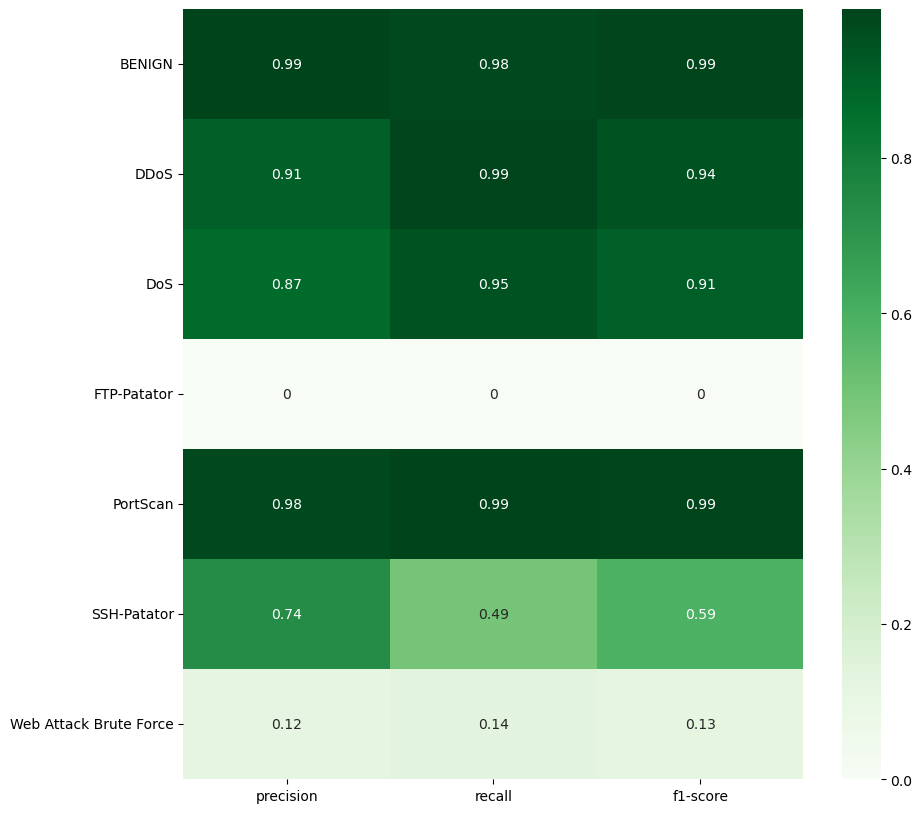

In [89]:
# plot the classification report without accuracy and macro avg and weighted avg
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred, target_names=label_mapping.keys(), output_dict=True)).iloc[:-1, :-3].T, annot=True, cmap='Greens')
plt.show()

In [174]:
# get accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test, y_pred))


Accuracy score:  0.959613478691774


In [175]:
# get confusion matrix with original labels
from sklearn.metrics import confusion_matrix
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))


Confusion matrix: 
[[554741   1067   7366   2729    483   1131    225]
 [   712  29989   1121    119      5      0      0]
 [  7808    908  53221    397     17    446      8]
 [   533    669    749      8      2      0      0]
 [   110      2    129      0  39739      3      0]
 [   853      0    613      8      3      4      0]
 [   299      0      9      0      0      1     73]]


In [178]:
# get feature importances with original column names and also get top 5 features
feature_importances = pd.DataFrame(classifier.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print("Top 10 features: ")
print(feature_importances.head(10))

Top 10 features: 
                        Importance
Flow Duration                 2706
Fwd IAT Total                 2043
Flow IAT Std                  1859
Flow IAT Max                  1712
Fwd IAT Std                   1708
Fwd IAT Max                   1413
Average Packet Size           1110
Bwd Packet Length Mean        1094
Packet Length Mean            1004
Packet Length Std              932
